## Data Loading

In [130]:
import h5py
import numpy as np
import pickle

# data = h5py.File('/home/sunji/ANN/glove_200_angular/glove-200-angular.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/glove_200_angular/clusters_glove_200_angular.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/glove_200_angular/ground_truth_glove_200_angular_0_4_0_5.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)

# data = h5py.File('/home/sunji/ANN/fashion_mnist_784_euclidean/fashion-mnist-784-euclidean.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/fashion_mnist_784_euclidean/clusters_fashion_mnist_784_euclidean.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/fashion_mnist_784_euclidean/ground_truth_fashion_mnist_784_euclidean_0_0_0_5.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)
    
# data = h5py.File('/home/sunji/ANN/nytimes_256_angular/nytimes-256-angular.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/nytimes_256_angular/clusters_nytimes_256_angular.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/nytimes_256_angular/ground_truth_nytimes_256_angular_0_4_0_5.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)
    
# data = h5py.File('/home/sunji/ANN/sift_128_euclidean/sift-128-euclidean.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/sift_128_euclidean/clusters_sift_128_euclidean.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/sift_128_euclidean/ground_truth_sift_128_euclidean_0_0_0_2.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)

# data = h5py.File('/home/sunji/ANN/kosarak_jaccard/kosarak-jaccard.hdf5', 'r')
# data_train = np.array(data['train'])
# data_test = np.array(data['test'])
# with open('/home/sunji/ANN/kosarak_jaccard/clusters_kosarak_jaccard.pkl', 'rb') as f:
#     clusters = pickle.load(f)
# with open('/home/sunji/ANN/kosarak_jaccard/ground_truth_kosarak_jaccard_0_9_1_0.pkl', 'rb') as f:
#     ground_truth_total = pickle.load(f)

data = h5py.File('/home/sunji/ANN/gist_960_euclidean/gist-960-euclidean.hdf5', 'r')
data_train = np.array(data['train'])
data_test = np.array(data['test'])
with open('/home/sunji/ANN/gist_960_euclidean/clusters_gist_960_euclidean.pkl', 'rb') as f:
    clusters = pickle.load(f)
with open('/home/sunji/ANN/gist_960_euclidean/ground_truth_gist_960_euclidean_0_0_0_1.pkl', 'rb') as f:
    ground_truth_total = pickle.load(f)


In [131]:
data_train[0]

array([0.0459, 0.0439, 0.0251, 0.0318, 0.0159, 0.0564, 0.0335, 0.0273,
       0.0156, 0.0627, 0.0504, 0.0116, 0.0289, 0.0432, 0.0388, 0.0282,
       0.0405, 0.0417, 0.0309, 0.0338, 0.0165, 0.0291, 0.0245, 0.0208,
       0.0207, 0.0727, 0.0386, 0.0145, 0.0347, 0.0462, 0.0238, 0.0333,
       0.0616, 0.0418, 0.0344, 0.0448, 0.0221, 0.0348, 0.0275, 0.0319,
       0.0445, 0.1036, 0.0365, 0.0168, 0.0539, 0.0554, 0.0224, 0.0432,
       0.1612, 0.0764, 0.0892, 0.1059, 0.0974, 0.057 , 0.064 , 0.072 ,
       0.1108, 0.1132, 0.0399, 0.035 , 0.0914, 0.0654, 0.0676, 0.0481,
       0.2254, 0.0976, 0.1954, 0.1424, 0.1787, 0.0932, 0.0989, 0.0909,
       0.1794, 0.0632, 0.104 , 0.0889, 0.1972, 0.0874, 0.1693, 0.1058,
       0.0982, 0.0606, 0.1163, 0.0678, 0.0728, 0.065 , 0.029 , 0.0384,
       0.0692, 0.0409, 0.0631, 0.0669, 0.1183, 0.0573, 0.0792, 0.1229,
       0.0317, 0.0608, 0.0381, 0.0357, 0.0282, 0.0554, 0.0146, 0.0199,
       0.0332, 0.0343, 0.0357, 0.0265, 0.0308, 0.0283, 0.0285, 0.0467,
      

In [132]:
from numpy import dot
from numpy.linalg import norm
from scipy import spatial

def euclidean_dist_normalized(x1, x2=None, eps=1e-8):
    if np.isnan(x2):
        return 1.0
    left = x1
    right = x2
    return np.sqrt(((left - right) ** 2).mean())

def angular_dist(x1, x2=None, eps=1e-8):
    cosine_sim = 1 - spatial.distance.cosine(x1, x2)
#     print (cosine_sim)
    distance = np.arccos(cosine_sim) / 3.14159267
    return distance

def jaccard(x1, x2=None, eps=1e-8):
    x1 = x1.astype(bool)
    x2 = x2.astype(bool)
    return 1.0 - np.double(np.bitwise_and(x1, x2).sum()) / np.double(np.bitwise_or(x1, x2).sum())


In [133]:
# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.4
# max_threshold = 0.5
# slot = 0.002
# queries_dimension = 200
# normalize_factor = 1.0
# distance_function = angular_dist
# hidden_num = 256
# output_num = cluster_size

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.0
# max_threshold = 0.5
# slot = 0.01
# queries_dimension = 784
# normalize_factor = 255.0
# distance_function = euclidean_dist_normalized
# hidden_num = 256
# output_num = cluster_size

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.4
# max_threshold = 0.5
# slot = 0.002
# queries_dimension = 256
# normalize_factor = 1.0
# distance_function = angular_dist
# hidden_num = 256
# output_num = cluster_size

# cluster_size = len(clusters)
# query_size = 10000
# min_threshold = 0.0
# max_threshold = 0.2
# slot = 0.004
# queries_dimension = 128
# normalize_factor = 218.0
# distance_function = euclidean_dist_normalized
# hidden_num = 256
# output_num = cluster_size


# cluster_size = len(clusters)
# query_size = 500
# min_threshold = 0.9
# max_threshold = 1.0
# slot = 0.002
# queries_dimension = 27983
# normalize_factor = 1.0
# distance_function = jaccard
# hidden_num = 256
# output_num = cluster_size

cluster_size = len(clusters)
query_size = 1000
min_threshold = 0.0
max_threshold = 0.1
slot = 0.001
queries_dimension = 960
normalize_factor = 1.0
distance_function = euclidean_dist_normalized
hidden_num = 256
output_num = cluster_size

In [134]:
ground_truth_total_level = [[[] for _ in range(query_size)] for _ in range(cluster_size)]
for clus in range(cluster_size):
    for t in ground_truth_total[clus]:
        ground_truth_total_level[t[0]][t[1]].append(t)

In [135]:
centroids = []
for cluster in clusters:
    centroids.append(np.mean(cluster))

In [136]:
for c in clusters:
    print (len(c))

19460
22451
9226
3297
7335
3941
1144
22687
14953
13057
3730
16534
3346
4473
10449
2408
11085
2223
11308
12508
3364
18262
17352
18539
4102
15205
19432
8209
1974
2268
15266
14852
1797
4786
622
2653
2440
14637
8620
7867
1261
22206
12503
2848
9164
20903
9784
6008
10728
7680
3401
5780
6223
25811
12518
5187
5618
16288
10840
7832
12791
10100
6546
11547
10845
16868
4874
4097
6740
12243
2201
6153
5540
5158
24527
16587
7315
16282
17897
6438
7292
7982
1665
16333
1852
15098
22061
11272
10349
11678
10344
26877
6249
6701
9622
8905
9828
14158
3207
13333


## Prepare Inputs

In [137]:
train_features = []
train_thresholds = []
train_distances = []
train_targets = []
train_cards = []
for query_id in range(int(query_size * 0.8)):
    cardinality = [0 for _ in range(cluster_size)]
    distances2centroids = []
    for cc in centroids:
        distances2centroids.append(distance_function(data_test[query_id] / normalize_factor, cc / normalize_factor))
    for threshold_id, threshold in enumerate(np.arange(min_threshold, max_threshold, slot)):
        indicator = []
        cards = []
        for cluster_id in range(cluster_size):
            cardinality[cluster_id] += ground_truth_total_level[cluster_id][query_id][threshold_id][-1]
            if cardinality[cluster_id] > 0:
                indicator.append(1)
            else:
                indicator.append(0)
            cards.append(cardinality[cluster_id])
        feature = data_test[query_id] / normalize_factor
        train_features.append(feature)
        train_distances.append(distances2centroids)
        train_thresholds.append([threshold+slot])
        train_targets.append(indicator)
        train_cards.append(cards)

test_features = []
test_thresholds = []
test_distances = []
test_targets = []
test_cards = []
for query_id in range(int(query_size * 0.8),query_size):
    cardinality = [0 for _ in range(cluster_size)]
    distances2centroids = []
    for cc in centroids:
        distances2centroids.append(distance_function(data_test[query_id] / normalize_factor, cc / normalize_factor))
    for threshold_id, threshold in enumerate(np.arange(min_threshold, max_threshold, slot)):
        indicator = []
        cards = []
        for cluster_id in range(cluster_size):
            cardinality[cluster_id] += ground_truth_total_level[cluster_id][query_id][threshold_id][-1]
            if cardinality[cluster_id] > 0:
                indicator.append(1)
            else:
                indicator.append(0)
            cards.append(cardinality[cluster_id])
        feature = data_test[query_id] / normalize_factor
        test_features.append(feature)
        test_distances.append(distances2centroids)
        test_thresholds.append([threshold+slot])
        test_targets.append(indicator)
        test_cards.append(cards)
        
        

In [138]:
test_distances[0][0]

0.033547178

In [139]:
import torch
import torch.utils.data

batch_size = 128
train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.FloatTensor(train_features), torch.FloatTensor(train_thresholds), torch.FloatTensor(train_distances), torch.FloatTensor(train_targets), torch.FloatTensor(train_cards)), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(torch.FloatTensor(test_features), torch.FloatTensor(test_thresholds), torch.FloatTensor(test_distances), torch.FloatTensor(test_targets), torch.FloatTensor(test_cards)), batch_size=batch_size, shuffle=True)


## Multi-label Networks

In [142]:
from __future__ import print_function
import argparse
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.nn1 = nn.Linear(queries_dimension, hidden_num)
        self.nn2 = nn.Linear(hidden_num, hidden_num)
#         self.nn3 = nn.Linear(hidden_num, hidden_num)
        
        self.dist1 = nn.Linear(cluster_size, hidden_num)
        self.dist2 = nn.Linear(hidden_num, hidden_num)
        
        self.nn4 = nn.Linear(hidden_num, hidden_num)
        self.nn5 = nn.Linear(hidden_num, output_num)
        
        self.thres1 = nn.Linear(1, hidden_num)
        self.thres2 = nn.Linear(hidden_num, 1)

    def forward(self, x, distances, thresholds):
        out1 = F.relu(self.nn1(x))
        out2 = F.relu(self.nn2(out1))
#         out3 = F.relu(self.nn3(out2))
#         print (distances.shape)
        distance1 = F.relu(self.dist1(distances))
        distance2 = F.relu(self.dist2(distance1))
        
        thresholds_1 = F.relu(self.thres1(thresholds))
        thresholds_2 = self.thres2(thresholds_1)

        out4 = F.relu(self.nn4((out2 + distance2) / 2))
        out5 = self.nn5(out2)
        
        probability = F.sigmoid(out5 + thresholds_2)
        return probability

def loss_fn(estimates, targets, cards):
    punish_idx = (estimates < 0.5).float()
#     return F.mse_loss(estimates, targets) - 0.01 * (estimates * cards).mean()
    min_v, _ = torch.min(cards, dim=1)
    max_v, _ = torch.max(cards, dim=1)
    min_v = min_v.unsqueeze(dim=1)
    max_v = max_v.unsqueeze(dim=1)
    range_v = max_v - min_v
#     print (min_v.shape,range_v.shape)
    normalized_cards = (cards - min_v) / (range_v + 0.01)
    loss = ((F.relu(estimates - targets) + F.relu(targets - estimates) * (normalized_cards + 1.0)) ** 2).sum(dim=1).mean()
#     return loss
    return F.mse_loss(estimates, targets)
#     return F.mse_loss(estimates, targets) - (estimates * cards).mean()
#     return F.mse_loss(estimates, targets) - (estimates * cards).mean() / F.mse_loss(estimates, targets) 
#     return F.mse_loss(estimates, targets) * torch.exp(1 + 1 / (estimates * cards + 0.1)).mean() 
#     return F.mse_loss(estimates, targets) - 0.2 * torch.log((estimates * cards).mean() + 1.0)
#     return F.mse_loss(estimates, targets) + 0.2 * ((0.5 - estimates) * cards * punish_idx).mean()
#     return F.mse_loss(estimates, targets) + 0.2 * torch.log((cards * punish_idx) + 1.0).mean()

def print_loss(estimates, targets, cards):
    true_positive = 0.0
    true_negative = 0.0
    false_positive = 0.0
    false_negative = 0.0
    num_elements = estimates.shape[1]
    for est, tar in zip(estimates, targets):
        for i in range(num_elements):
            if est[i] < 0.5 and tar[i] == 0:
                true_negative += 1
            elif est[i] < 0.5 and tar[i] == 1:
                false_negative += 1
            elif est[i] >= 0.5 and tar[i] == 0:
                false_positive += 1
            else:
                true_positive += 1
    if true_positive + false_positive > 0:
        precision = true_positive / (true_positive + false_positive)
    else:
        precision = 1.0
    if true_positive + false_negative > 0:
        recall = true_positive / (true_positive + false_negative)
    else:
        recall = 1.0
    total_card = cards.sum(dim=1)
#     print ('total_card: ', total_card.shape)
    miss_card = torch.FloatTensor([cards[i][((estimates[i] < 0.5).nonzero())].sum() for i in range(cards.shape[0])])
#     print ('miss_card: ', miss_card.shape)
    miss_rate = (miss_card / (total_card + 0.1)).mean()
    return precision, recall, miss_rate

In [143]:
model = Model()
opt = optim.Adam(model.parameters(), lr=0.001)
for e in range(5):
    model.train()
    for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(train_loader):
        x = Variable(features)
        y = Variable(targets.unsqueeze(1))
        z = Variable(thresholds)
        dists = Variable(distances)
        opt.zero_grad()
        estimates = model(x, dists, z)
        loss = loss_fn(estimates, targets, cards)
        if batch_idx % 100 == 0:
            print('Training: Iteration {0}, Batch {1}, Loss {2}'.format(e, batch_idx, loss.item()))
        loss.backward()
        opt.step()
#         next(model.thres1.parameters()).data.clamp_(0)
#         next(model.thres2.parameters()).data.clamp_(0)

    model.eval()
    test_loss = 0.0
    precision = 0.0
    recall = 0.0
    miss_rate = 0.0
    for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(test_loader):
        x = Variable(features)
        y = Variable(targets.unsqueeze(1))
        z = Variable(thresholds)
        dists = Variable(distances)
        estimates = model(x, dists, z)
        loss = loss_fn(estimates, targets, cards)
        test_loss += loss.item()
        prec, rec, miss = print_loss(estimates, targets, cards)
        precision += prec
        recall += rec
        miss_rate += miss
        if batch_idx % 100 == 0:
            print ('Testing: Iteration {0}, Batch {1}, Loss {2}, Precision {3}, Recall {4}, Miss {5}'.format(e, batch_idx, loss.item(), prec, rec, miss))
    test_loss /= len(test_loader)
    precision /= len(test_loader)
    recall /= len(test_loader)
    miss_rate /= len(test_loader)
    print ('Testing: Loss {0}, Precision {1}, Recall {2}, Miss {3}'.format(test_loss, precision, recall, miss_rate))
    
    

Training: Iteration 0, Batch 0, Loss 0.2487023025751114
Training: Iteration 0, Batch 100, Loss 0.21965797245502472
Training: Iteration 0, Batch 200, Loss 0.18879495561122894
Training: Iteration 0, Batch 300, Loss 0.1589684933423996
Training: Iteration 0, Batch 400, Loss 0.13136285543441772
Training: Iteration 0, Batch 500, Loss 0.1092674732208252
Training: Iteration 0, Batch 600, Loss 0.08845773339271545
Testing: Iteration 0, Batch 0, Loss 0.085109643638134, Precision 0.9268210808996308, Recall 0.9653846153846154, Miss 0.028023241087794304
Testing: Iteration 0, Batch 100, Loss 0.09515005350112915, Precision 0.9365105271748001, Recall 0.9537898936170213, Miss 0.02839808724820614
Testing: Loss 0.09328809850344992, Precision 0.9315892027801005, Recall 0.9594260731602019, Miss 0.036547984927892685
Training: Iteration 1, Batch 0, Loss 0.08565320074558258
Training: Iteration 1, Batch 100, Loss 0.07310344278812408
Training: Iteration 1, Batch 200, Loss 0.07236289978027344
Training: Iteration 

In [ ]:
(distances[2], features[2])

In [ ]:
for name, param in model.thres1.named_parameters():
    print (name, param.data)

In [11]:
torch.save(model.state_dict(), '/home/sunji/ANN/fashion_mnist_784_euclidean/saved_models/global_fashion_mnist_784_euclidean_punish_query_threshold_monotonic.model')

## Model Usage

In [10]:
model = Model()
model.load_state_dict(torch.load('/home/sunji/ANN/sift_128_euclidean/global_sift_128_euclidean_binary_query_threshold.model'))
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/home/sunji/ANN/sift_128_euclidean/global_sift_128_euclidean_binary_query_threshold.model'

In [39]:
for batch_idx, (features, thresholds, distances, targets, cards) in enumerate(test_loader):
    x = Variable(features)
    y = Variable(targets.unsqueeze(1))
    z = Variable(thresholds)
    dist = Variable(distances)
    estimates = model(x, dist, z)
    loss = loss_fn(estimates, targets, cards)
    prec, rec, miss_rate = print_loss(estimates, targets, cards)
    print (loss.item(), prec, rec, miss_rate)
#     print (targets[0])

total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.011616033501923084 0.9865168539325843 0.9653655854865311 tensor(0.0307)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.013758893124759197 0.9868929952728835 0.9659305993690852 tensor(0.0149)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.010944121517241001 0.9889834752128193 0.9657701711491442 tensor(0.0170)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.012130827642977238 0.9878915504080021 0.9596011250319612 tensor(0.0179)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.011950699612498283 0.9855285749325484 0.972645848462842 tensor(0.0386)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.014175038784742355 0.9893148962916405 0.9622987568779295 tensor(0.0226)
total_card:  torch.Size([128])
miss_card:  torch.Size([128])
0.014790528453886509 0.9867578900904878 0.9652417962003454 tensor(0.0361)
total_card:  torch.Size([128])
miss_card:  torch.Size([1

KeyboardInterrupt: 

In [ ]:
use_cuda = torch.cuda.is_available()

#     torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")
train_dataset = np.array(f['train'])
test_dataset = np.array(f['test'])
train_lefts, train_rights, test_lefts, test_rights = prepare_dataset(train_dataset, test_dataset, train_num, test_num)

train_loader = torch.utils.data.DataLoader(
    (train_lefts, train_rights), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    (test_lefts, test_rights), batch_size=batch_size, shuffle=True)


In [ ]:
# hash_distances, input_distances = test(model, device, train_loader)
hash_distances, input_distances = test(model, device, test_loader)

In [ ]:
lefts = torch.FloatTensor([f['train'][0] for x in range(999)])
rights = torch.FloatTensor(f['train'][1:1000])
inputdistance = angular_distance(lefts, rights).detach().numpy()
hashdistance = l1_distance(model(lefts), model(rights)).detach().numpy()


In [ ]:
# for xx in zip(inputdistance, hashdistance):
#     print (xx[0], xx[1])
index_1 = np.argsort(hashdistance, 0)
index_2 = np.argsort(inputdistance, 0)
# np.random.shuffle(index_2)

input_index = {}
for pos, idx in enumerate(index_2):
    input_index[idx] = pos
sum = 0.0
for pos, idx in enumerate(index_1):
    sum += np.abs(pos - input_index[idx])
sum / len(index_1)

In [ ]:
xxx = np.sort(inputdistance, 0)
plt.plot(xxx)
plt.show()

In [ ]:
import math
distances = []
for i in index_1:
    distances.append(math.floor(inputdistance[i].item()* 40))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances)
plt.show()

In [ ]:
F.cosine_similarity(torch.FloatTensor(f['train'][0]).unsqueeze(0), torch.FloatTensor(f['train'][6]).unsqueeze(0), dim=1, eps=1e-8)

In [ ]:
for x, y in zip(hash_distances[0][0:30], input_distances[0][0:30]):
    print (x, y)

In [ ]:
dataset_vector = model(torch.FloatTensor(f['train']))

In [ ]:
query_vector = model(torch.FloatTensor(f['test']))

In [ ]:
def binarization(vector):
    query_codes = []
    for v in vector:
        binary_code = []
        for e in v:
            if e < 0.5:
                binary_code.append(0)
            else:
                binary_code.append(1)
        query_codes.append(binary_code)
    return np.array(query_codes)
dataset_binary = binarization(dataset_vector.detach().numpy())
query_binary = binarization(query_vector.detach().numpy())

In [ ]:
len(dataset_binary)

In [ ]:
len(query_binary)

In [ ]:
import math
hash_table = {}
for idx, point in enumerate(dataset_binary):
    pos = 0
    key = 0
    for d in point:
        key += d * math.pow(2, pos)
        pos += 1
    if key in hash_table:
        hash_table[key].append(idx)
    else:
        hash_table[key] = [idx]

In [ ]:
f['neighbors'][:]

In [ ]:
def find_candidate_distance(vector, hash_table, candidate_num):
    candidate = []
    for point in query_binary:
        cand = []
        dis = 0
        while len(cand) < 100:
            pos = 0
            key = 0
            for d in point:
                key += d * math.pow(2, pos)
                pos += 1
            if key in hash_table:
                candidate.append(hash_table[key])
    return candidate
find_candidate_0_distance(query_binary, hash_table)

In [ ]:
class Node(object):
    def __init__(hash_code, data_index_set):
        self.hash_code = hash_code
        self.data_index_set = data_index_set
        self.children = []
        
    def isLeaf():
        return len(self.children) == 0
    
    def train(dataset):
        train_data = dataset[self.data_index_set]
        self.model = train(dataset)
        
    def partition():
        points = dataset[self.data_index_set]
        hash_table = {}
        codes = self.model(points)
        for idx, code in enumerate(codes):
            if code in hash_table:
                hash_table[code].append(self.data_index_set[idx])
            else:
                hash_table[code] = [self.data_index_set[idx]]
        for key,value in d.items():
            self.children.append(Node(key, value))
    
    def search(query, dataset):
        if self.isLeaf():
            return validate(dataset[self.data_index_set])
        else:
            children_idxes = select_children(query)
            result = []
            for idx in children_idxes:
                result += self.children[idx].search(query, dataset)
            return result
    
    
    

def index_construction(dataset):
    model = train(dataset)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

data = np.array(f['train'])

tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(data[np.random.choice(data.shape[0], 100000, replace=False)])

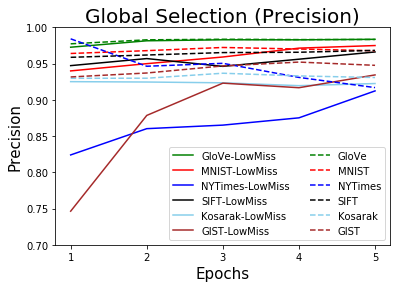

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

precisions = {'GloVe': [0.972614081, 0.981475733, 0.982865707, 0.982818314, 0.98351151],
              'MNIST': [0.939919673,0.949919673,0.95909317,0.971332628,0.974908007],
              'NYTimes': [0.823998051,0.860245497,0.86512056,0.875167124,0.912318124],
              'SIFT': [0.947199478,0.956931235,0.94619507,0.956075692,0.966044702],
              'Kosarak': [0.925099224,0.924588869,0.923492296,0.919557195,0.922500722],
              'GIST': [0.746364332,0.878498124,0.923020397,0.916721497,0.934381747]}

recalls = {'GloVe': [0.98883001, 0.98883001, 0.987974695, 0.98780326, 0.986844394],
           'MNIST': [0.968439708,0.985174223,0.986807838,0.980216917,0.980216917],
           'NYTimes': [0.876037524,0.99020144,0.99020144,1.0,1.0],
           'SIFT': [0.948890437,0.955700085,0.96875888,0.964463884,0.955726559],
           'Kosarak': [0.996179443,0.997250079,0.997019317,0.998639459,0.997454687],
           'GIST': [0.985724694,0.995125214,0.990018466,0.993968373,0.989732455]}

misses = {'GloVe': [0.001750918, 0.001750918, 0.00143185, 0.000990906, 0.000817079],
          'MNIST': [0.061800007, 0.035969682, 0.028243328, 0.026218255, 0.024243328],
          'NYTimes': [0.002298082, 0.000844907, 0, 0, 0],
          'SIFT': [0.042955745, 0.04127859, 0.036689825, 0.036410738, 0.039762415],
          'Kosarak': [0.000459788, 0.000111619, 0.000126192, 0.0000631692, 0.000108504],
          'GIST': [0.019570477, 0.022529079, 0.025336806, 0.02392376, 0.023158645]}

precisions_base = {'GloVe': [0.977296266, 0.98280881, 0.983584108, 0.983138103, 0.983274932],
              'MNIST': [0.963963237,0.967853512,0.972253609,0.970118312,0.967788483],
              'NYTimes': [0.984161772,0.946355548,0.950389886,0.930941199,0.916893798],
              'SIFT': [0.958671376,0.961849301,0.965209411,0.965647613,0.968194069],
              'Kosarak': [0.929740255,0.929835453,0.936708625,0.932997461,0.930791379],
              'GIST': [0.931589203,0.937031977,0.946805737,0.952089188,0.947623603]}

recalls_base = {'GloVe': [0.990772087, 0.987879097, 0.987183845, 0.987431923, 0.986785049],
           'MNIST': [0.975879759,0.979371638,0.9769137,0.981434038,0.980543377],
           'NYTimes': [0.751207896,0.927269873,0.949988029,0.950425791,0.983768002],
           'SIFT': [0.953565397,0.959876703,0.959594611,0.960790019,0.958777855],
           'Kosarak': [0.994613897,0.993089315,0.999281176,0.994951409,0.996190606],
           'GIST': [0.959426073,0.966050973,0.978374274,0.978673666,0.981025701]}

misses_base = {'GloVe': [0.003019362, 0.002068712, 0.002389478, 0.002533717, 0.002665348],
          'MNIST': [0.052421164, 0.038539141, 0.034214899, 0.033073112, 0.033803076],
          'NYTimes': [0.023446698, 0.006721317, 0.004742846, 0.004708881, 0.001532235],
          'SIFT': [0.057230063, 0.053600412, 0.053821139, 0.053561512, 0.055002037],
          'Kosarak': [0.000574375, 0.000817982, 0.000315629, 0.000417519, 0.000524088],
          'GIST': [0.036547985, 0.033578075, 0.035722524, 0.038696181, 0.037254956]}

x_axix = [1,2,3,4,5]
plt.title('Global Selection (Precision)', fontsize=20)
plt.ylim((0.7,1.0))
plt.xticks(x_axix)
plt.plot(x_axix, precisions['GloVe'], color='green', label='GloVe-LowMiss')
plt.plot(x_axix, precisions['MNIST'], color='red', label='MNIST-LowMiss')
plt.plot(x_axix, precisions['NYTimes'], color='blue', label='NYTimes-LowMiss')
plt.plot(x_axix, precisions['SIFT'], color='black', label='SIFT-LowMiss')
plt.plot(x_axix, precisions['Kosarak'], color='skyblue', label='Kosarak-LowMiss')
plt.plot(x_axix, precisions['GIST'], color='brown', label='GIST-LowMiss')

plt.plot(x_axix, precisions_base['GloVe'], color='green', linestyle='dashed', label='GloVe')
plt.plot(x_axix, precisions_base['MNIST'], color='red', linestyle='dashed', label='MNIST')
plt.plot(x_axix, precisions_base['NYTimes'], color='blue', linestyle='dashed', label='NYTimes')
plt.plot(x_axix, precisions_base['SIFT'], color='black', linestyle='dashed', label='SIFT')
plt.plot(x_axix, precisions_base['Kosarak'], color='skyblue', linestyle='dashed', label='Kosarak')
plt.plot(x_axix, precisions_base['GIST'], color='brown', linestyle='dashed', label='GIST')
# plt.plot(x_axix, recalls, color='red', label='testing accuracy')
# plt.plot(x_axix, misses,  color='skyblue', label='PN distance')
plt.legend(fontsize=10, ncol=2) # 显示图例
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.savefig('global_precision.eps', format='eps', bbox_inches='tight')


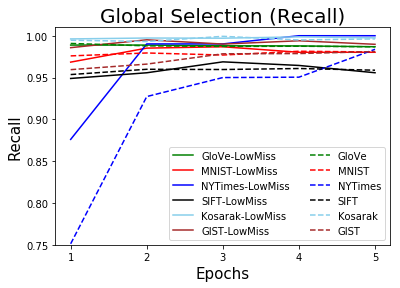

In [160]:
x_axix = [1,2,3,4,5]
plt.title('Global Selection (Recall)', fontsize=20)
plt.ylim((0.75,1.01))
plt.xticks(x_axix)
plt.plot(x_axix, recalls['GloVe'], color='green', label='GloVe-LowMiss')
plt.plot(x_axix, recalls['MNIST'], color='red', label='MNIST-LowMiss')
plt.plot(x_axix, recalls['NYTimes'], color='blue', label='NYTimes-LowMiss')
plt.plot(x_axix, recalls['SIFT'], color='black', label='SIFT-LowMiss')
plt.plot(x_axix, recalls['Kosarak'], color='skyblue', label='Kosarak-LowMiss')
plt.plot(x_axix, recalls['GIST'], color='brown', label='GIST-LowMiss')

plt.plot(x_axix, recalls_base['GloVe'], color='green', linestyle='dashed', label='GloVe')
plt.plot(x_axix, recalls_base['MNIST'], color='red', linestyle='dashed', label='MNIST')
plt.plot(x_axix, recalls_base['NYTimes'], color='blue', linestyle='dashed', label='NYTimes')
plt.plot(x_axix, recalls_base['SIFT'], color='black', linestyle='dashed', label='SIFT')
plt.plot(x_axix, recalls_base['Kosarak'], color='skyblue', linestyle='dashed', label='Kosarak')
plt.plot(x_axix, recalls_base['GIST'], color='brown', linestyle='dashed', label='GIST')
# plt.plot(x_axix, recalls, color='red', label='testing accuracy')
# plt.plot(x_axix, misses,  color='skyblue', label='PN distance')
plt.legend(fontsize=10, ncol=2) # 显示图例
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Recall', fontsize=15)
plt.savefig('global_recall.eps', format='eps', bbox_inches='tight')

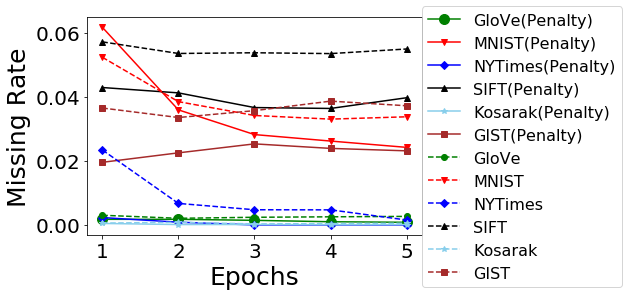

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x_axix = [1,2,3,4,5]
# plt.title('Global Selection (Missing Rate)', fontsize=20)
# plt.ylim((0.0,0.1))
plt.xticks(x_axix)
plt.plot(x_axix, misses['GloVe'], color='green', label='GloVe(Penalty)', marker='o',  markersize=10)
plt.plot(x_axix, misses['MNIST'], color='red', label='MNIST(Penalty)', marker='v',  markersize=10)
plt.plot(x_axix, misses['NYTimes'], color='blue', label='NYTimes(Penalty)', marker='D',  markersize=10)
plt.plot(x_axix, misses['SIFT'], color='black', label='SIFT(Penalty)', marker='^',  markersize=10)
plt.plot(x_axix, misses['Kosarak'], color='skyblue', label='Kosarak(Penalty)', marker='*',  markersize=10)
plt.plot(x_axix, misses['GIST'], color='brown', label='GIST(Penalty)', marker='s',  markersize=10)

plt.plot(x_axix, misses_base['GloVe'], color='green', linestyle='dashed', label='GloVe', marker='o',  markersize=10)
plt.plot(x_axix, misses_base['MNIST'], color='red', linestyle='dashed', label='MNIST', marker='v',  markersize=10)
plt.plot(x_axix, misses_base['NYTimes'], color='blue', linestyle='dashed', label='NYTimes', marker='D',  markersize=10)
plt.plot(x_axix, misses_base['SIFT'], color='black', linestyle='dashed', label='SIFT', marker='^',  markersize=10)
plt.plot(x_axix, misses_base['Kosarak'], color='skyblue', linestyle='dashed', label='Kosarak', marker='*',  markersize=10)
plt.plot(x_axix, misses_base['GIST'], color='brown', linestyle='dashed', label='GIST', marker='s',  markersize=10)
# plt.plot(x_axix, recalls, color='red', label='testing accuracy')
# plt.plot(x_axix, misses,  color='skyblue', label='PN distance')
plt.legend(fontsize=16, ncol=1, bbox_to_anchor=(1.0,1.05),borderaxespad = 0.) # 显示图例
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Epochs', fontsize=25)
plt.ylabel('Missing Rate', fontsize=25)
# plt.legend(fontsize = 16, col=6)
plt.savefig('global_miss.eps', format='eps', bbox_inches='tight')